In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import math as math
from scipy.stats import poisson,skellam

Import Dataset

In [2]:
matches = pd.read_csv("epl_results_2022-23.csv")

In [3]:
matches

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,A,...,2,2,16,11,3,5,1,2,0,0
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,H,...,3,4,7,9,4,4,2,0,0,0
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,H,...,3,2,18,16,5,5,3,3,0,0
3,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,D,...,4,6,13,9,6,4,2,0,0,0
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H,0,0,D,...,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H,0,0,D,...,6,2,11,12,9,3,1,3,0,0
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A,0,1,A,...,2,7,7,5,12,3,3,0,0,0
377,28/05/2023,16:30,Leicester,West Ham,2,1,H,1,0,H,...,4,3,8,10,3,5,1,1,0,0
378,28/05/2023,16:30,Man United,Fulham,2,1,H,1,1,D,...,8,3,14,10,5,4,1,2,0,0


Shape of Dataset

In [4]:
matches.shape

(380, 23)

Parameters/Columns in the Dataset

In [5]:
matches.columns

Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

Data Types of each Parameter

In [6]:
matches.dtypes

Date        object
Time        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

In [7]:
matches.info

<bound method DataFrame.info of            Date   Time        HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    05/08/2022  20:00  Crystal Palace      Arsenal     0     2   A     0   
1    06/08/2022  12:30          Fulham    Liverpool     2     2   D     1   
2    06/08/2022  15:00     Bournemouth  Aston Villa     2     0   H     1   
3    06/08/2022  15:00           Leeds       Wolves     2     1   H     1   
4    06/08/2022  15:00       Newcastle   Nottingham     2     0   H     0   
..          ...    ...             ...          ...   ...   ...  ..   ...   
375  28/05/2023  16:30         Everton  Bournemouth     1     0   H     0   
376  28/05/2023  16:30           Leeds    Tottenham     1     4   A     0   
377  28/05/2023  16:30       Leicester     West Ham     2     1   H     1   
378  28/05/2023  16:30      Man United       Fulham     2     1   H     1   
379  28/05/2023  16:30     Southampton    Liverpool     4     4   D     2   

     HTAG HTR  ... HST  AST  HF  AF  HC  AC

In [8]:
matches.describe

<bound method NDFrame.describe of            Date   Time        HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    05/08/2022  20:00  Crystal Palace      Arsenal     0     2   A     0   
1    06/08/2022  12:30          Fulham    Liverpool     2     2   D     1   
2    06/08/2022  15:00     Bournemouth  Aston Villa     2     0   H     1   
3    06/08/2022  15:00           Leeds       Wolves     2     1   H     1   
4    06/08/2022  15:00       Newcastle   Nottingham     2     0   H     0   
..          ...    ...             ...          ...   ...   ...  ..   ...   
375  28/05/2023  16:30         Everton  Bournemouth     1     0   H     0   
376  28/05/2023  16:30           Leeds    Tottenham     1     4   A     0   
377  28/05/2023  16:30       Leicester     West Ham     2     1   H     1   
378  28/05/2023  16:30      Man United       Fulham     2     1   H     1   
379  28/05/2023  16:30     Southampton    Liverpool     4     4   D     2   

     HTAG HTR  ... HST  AST  HF  AF  HC  

In [9]:
matches.isnull().sum()

Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [10]:
columns_to_drop = ['HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR']
matches.drop(columns=columns_to_drop, inplace=True)

In [11]:
matches

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H
3,06/08/2022,15:00,Leeds,Wolves,2,1,H
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H
...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A
377,28/05/2023,16:30,Leicester,West Ham,2,1,H
378,28/05/2023,16:30,Man United,Fulham,2,1,H


In [12]:
matches = matches.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})

In [13]:
matches

,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR
0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A
1,06/08/2022,12:30,Fulham,Liverpool,2,2,D
2,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H
3,06/08/2022,15:00,Leeds,Wolves,2,1,H
4,06/08/2022,15:00,Newcastle,Nottingham,2,0,H
...,...,...,...,...,...,...,...
375,28/05/2023,16:30,Everton,Bournemouth,1,0,H
376,28/05/2023,16:30,Leeds,Tottenham,1,4,A
377,28/05/2023,16:30,Leicester,West Ham,2,1,H
378,28/05/2023,16:30,Man United,Fulham,2,1,H


In [14]:
matches = matches[:-10]
matches.mean()

C:\Users\hario\AppData\Local\Temp\ipykernel_22224\3214366814.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  matches.mean()


HomeGoals    1.624324
AwayGoals    1.216216
dtype: float64

In [15]:
skellam.pmf(0.0,  matches.mean()[0],  matches.mean()[1])

C:\Users\hario\AppData\Local\Temp\ipykernel_22224\3192616270.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(0.0,  matches.mean()[0],  matches.mean()[1])


0.24490632889501476

In [16]:
skellam.pmf(1,  matches.mean()[0],  matches.mean()[1])

C:\Users\hario\AppData\Local\Temp\ipykernel_22224\2995982668.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skellam.pmf(1,  matches.mean()[0],  matches.mean()[1])


0.22500411111447213

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
goal_model_data = pd.concat([matches[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           matches[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

In [19]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

In [20]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1069.7
Date:                Mon, 08 Apr 2024   Deviance:                       813.72
Time:                        13:09:04   Pearson chi2:                     709.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2191
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4708      0.194      2.426      0.015       0.090       0.851
team[T.Aston Villa]           -0.5263      0.181     -2.915      0.004      -0.880      -0.172
team[T.Bournemouth]           -0.7890      0.198     -3.984      0.000      -1.177      -0.401
team[T.Brentford]             -0.3840      0.172     -2.227      0.026      -0.722      -0.046
team[T.Brighton]              -0.1588      0.162     -0.980      0.327      -0.476       0.159
team[T.Chelsea]               -0.8184      0.198     -4.134      0.000      -1.206      -0.430
team[T.Crystal Palace]        -0.7446      0.194     -3.828      0.000      -1.126      -0.363
team[T.Everton]               -0.9012      0.206     -4.371      0.000      -1.305      -0.497
team[T.Fulham]                -0.4346      0.175     -2.480      0.013      -0.778      -0.091
team[T.Leeds]                 -0.5312      0.183     -2.902      0.004      -0.890      -0.172
team[T.Leicester]             -0.5040      0.181     -2.791      0.005      -0.858      -0.150
team[T.Liverpool]             -0.1576      0.162     -0.972      0.331      -0.475       0.160
team[T.Man City]               0.1038      0.151      0.688      0.492      -0.192       0.400
team[T.Man United]            -0.3963      0.173     -2.287      0.022      -0.736      -0.057
team[T.Newcastle]             -0.2367      0.165     -1.439      0.150      -0.559       0.086
team[T.Nottingham]            -0.7957      0.198     -4.018      0.000      -1.184      -0.408
team[T.Southampton]           -0.9337      0.208     -4.479      0.000      -1.342      -0.525
team[T.Tottenham]             -0.2076      0.165     -1.255      0.209      -0.532       0.117
team[T.West Ham]              -0.6981      0.191     -3.650      0.000      -1.073      -0.323
team[T.Wolves]                -0.9871      0.211     -4.688      0.000      -1.400      -0.574
opponent[T.Aston Villa]        0.0280      0.214      0.131      0.896      -0.391       0.447
opponent[T.Bournemouth]        0.4470      0.194      2.303      0.021       0.067       0.828
opponent[T.Brentford]          0.0672      0.213      0.316      0.752      -0.349       0.484
opponent[T.Brighton]           0.1732      0.208      0.835      0.404      -0.233       0.580
opponent[T.Chelsea]            0.0350      0.212      0.165      0.869      -0.381       0.451
opponent[T.Crystal Palace]     0.0683      0.210      0.325      0.745      -0.344       0.480
opponent[T.Everton]            0.2345      0.202      1.159      0.246      -0.162       0.631
opponent[T.Fulham]             0.1595      0.207      0.769      0.442      -0.247       0.566
opponent[T.Leeds]              0.5237      0.192      2.725      0.006       0.147       0.900
opponent[T.Leicester]          0.4143      

In [21]:
poisson_model.predict(pd.DataFrame(data={'team': 'Man City', 'opponent': 'Wolves',
                                       'home':1},index=[1]))

1    2.854731
dtype: float64

In [22]:
poisson_model.predict(pd.DataFrame(data={'team': 'Wolves', 'opponent': 'Man City',
                                       'home':0},index=[1]))

1    0.457442
dtype: float64

In [23]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model, 'Bournemouth', 'Liverpool', max_goals=3)

array([[0.04513094, 0.09652292, 0.10321826, 0.07358534],
       [0.04330119, 0.09260957, 0.09903345, 0.07060195],
       [0.02077281, 0.04442744, 0.04750915, 0.03386976],
       [0.00664354, 0.01420873, 0.01519433, 0.01083219]])

In [24]:
bou_liv = simulate_match(poisson_model, 'Bournemouth', 'Liverpool', max_goals=10)
win_percentage = round(np.sum(np.tril(bou_liv, -1)) * 100)
draw_percentage = round(np.sum(np.diag(bou_liv)) * 100)
loss_percentage = round(np.sum(np.triu(bou_liv, 1)) * 100)


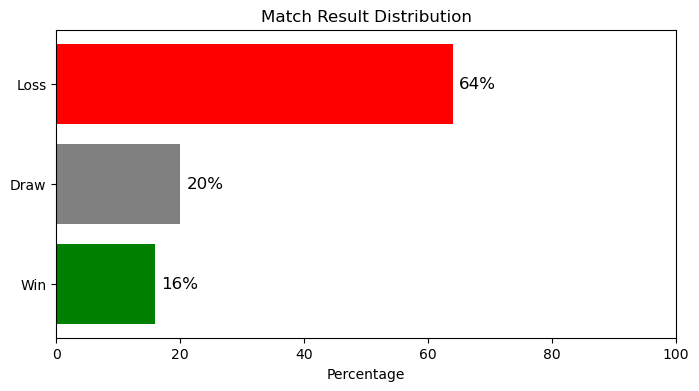

In [25]:
categories = ['Win', 'Draw', 'Loss']
percentages = [win_percentage, draw_percentage, loss_percentage]

plt.figure(figsize=(8, 4))  # Set the figure size
bars = plt.barh(categories, percentages, color=['green', 'gray', 'red'])

# Add percentages on the bars
for bar, percent in zip(bars, percentages):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{percent}%', 
             va='center', ha='left', fontsize=12)

plt.xlabel('Percentage')
plt.title('Match Result Distribution')
plt.xlim(0, 100)  # Set the x-axis limit to 0-100%
plt.show()


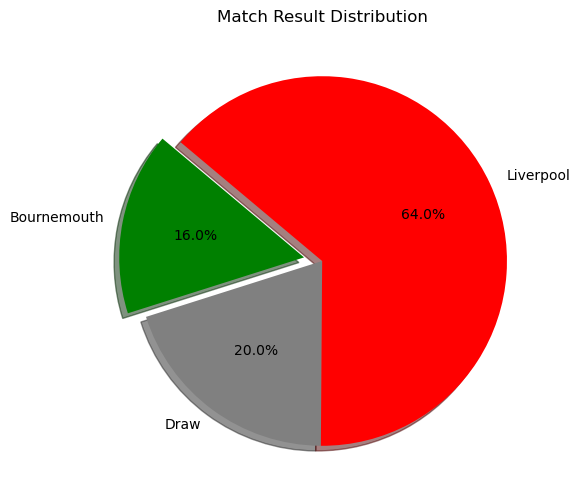

In [27]:
# Calculate win, draw, and loss percentages
win_percentage = round(np.sum(np.tril(bou_liv, -1)) * 100)
draw_percentage = round(np.sum(np.diag(bou_liv)) * 100)
loss_percentage = round(np.sum(np.triu(bou_liv, 1)) * 100)

# Data for the pie chart
labels = ['Bournemouth', 'Draw', 'Liverpool']
sizes = [win_percentage, draw_percentage, loss_percentage]
colors = ['green', 'gray', 'red']
explode = (0.1, 0, 0)  # Explode the 'Win' slice

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Match Result Distribution')
plt.show()
